In [1]:
# 미니 프로젝트
# 영화 페이지의 모든 댓글 중 가장 많이 출현하는 단어 상위 20개를 보여줍니다

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

In [4]:
driver = webdriver.Chrome("../chromedriver.exe")
driver.get("https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=191597&target=after")

In [5]:
def get_content(driver):
    each_page_comments = []
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    brs = soup.select("td.title > br")
    
    # text에 바로 접근하기 용이한 태그가 없음
    # 그래서 text 바로 앞에 나타나는 br태그에서 find_next_sibling으로 text를 찾음
    for br in brs:
        each_page_comments.append(br.find_next_sibling(text=True).strip())
        
    return each_page_comments

In [6]:
def move_next(driver):
    next_page = driver.find_element_by_css_selector ("#old_content > div.paging > div > a.pg_next")
    next_page.click()
    time.sleep(0.5)

In [7]:

contents = []
while True:
    try:
        contents += get_content(driver)
        move_next(driver)
    except:
        # 넘어갈 다음 댓글 페이지가 없으면 예외 발생
        break


In [8]:
coment_total_str = "".join(contents)
words = coment_total_str.split(" ")


In [9]:
import pandas as pd
from collections import Counter


In [10]:
df = pd.DataFrame(Counter(words).most_common(20))
df.columns = ["단어", "횟수"]


In [11]:
# 밑의 그래프에서 x, y축에 한글 적용하기 위한 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [13]:
df

,단어,횟수
0,너무,237
1,더,125
2,재밌게,95
3,,66
4,귀엽고,63
5,진짜,58
6,봤는데,55
7,보고,54
8,영화,47
9,수,47


<AxesSubplot:xlabel='횟수', ylabel='단어'>

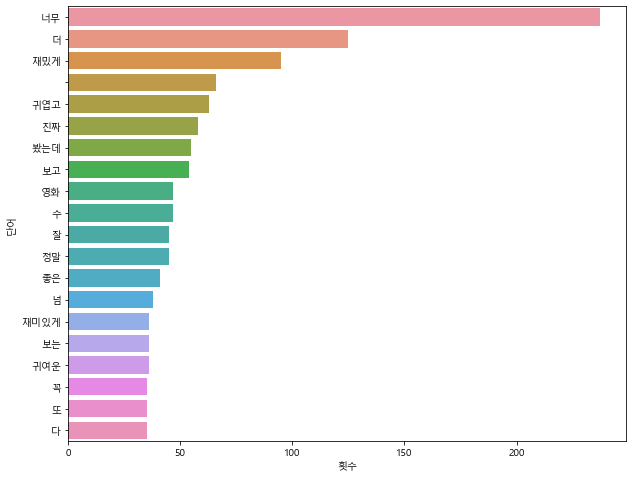

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 8))
sns.barplot(y = "단어", x = "횟수", data = df)